In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv(r"..\Data\customer_details.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [49]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Columns to encode
columns_to_encode = ["Gender", "Subscription Status", "Discount Applied", "Promo Code Used"]

# The first set of columns
encoder_first = OneHotEncoder(drop='first', sparse_output=False)
encoder_first.fit(df[columns_to_encode])

# Save the encoder with pickle
import pickle

filename = r"..\encoders\encoder_drop_first.pkl"
with open(filename, "wb") as file:
    pickle.dump(encoder_first, file)

# Encode the first set of columns
features_encoded = encoder_first.transform(df[columns_to_encode])
features_encoded_df = pd.DataFrame(features_encoded, columns=encoder_first.get_feature_names_out(), index=df.index)

# Numerical features
df_numerical = df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']]

# Concatenate numerical features and encoded features
df_encoded = pd.concat([df_numerical, features_encoded_df], axis=1)

# Additional columns to encode
additional_columns_to_encode = ["Season", "Payment Method", "Frequency of Purchases"]

# Initialize encoder for the additional set of columns
encoder_additional = OneHotEncoder(sparse_output=False)
encoder_additional.fit(df[additional_columns_to_encode])

filename = r"..\encoders\encoder_additional.pkl"
with open(filename, "wb") as file:
    pickle.dump(encoder_additional, file)

# Encode the additional set of columns
features_encoded_additional = encoder_additional.transform(df[additional_columns_to_encode])
features_encoded_df_additional = pd.DataFrame(features_encoded_additional, columns=encoder_additional.get_feature_names_out(),
                                             index=df.index)

# Concatenate additional encoded features
df_encoded_additional = pd.concat([df_encoded, features_encoded_df_additional], axis=1)
df_encoded_additional.head()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Male,Subscription Status_Yes,Discount Applied_Yes,Promo Code Used_Yes,Season_Fall,Season_Spring,...,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,55,53,3.1,14,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,19,64,3.1,2,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,50,73,3.1,23,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,21,90,3.5,49,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,45,49,2.7,31,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
df_encoded_additional.columns

Index(['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases',
       'Gender_Male', 'Subscription Status_Yes', 'Discount Applied_Yes',
       'Promo Code Used_Yes', 'Season_Fall', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Payment Method_Bank Transfer', 'Payment Method_Cash',
       'Payment Method_Credit Card', 'Payment Method_Debit Card',
       'Payment Method_PayPal', 'Payment Method_Venmo',
       'Frequency of Purchases_Annually', 'Frequency of Purchases_Bi-Weekly',
       'Frequency of Purchases_Every 3 Months',
       'Frequency of Purchases_Fortnightly', 'Frequency of Purchases_Monthly',
       'Frequency of Purchases_Quarterly', 'Frequency of Purchases_Weekly'],
      dtype='object')

In [51]:
# Check if rows showing "1" value are the same in Promo Code Used_Yes and Subscription Status_Yes columns
same_values = df_encoded_additional['Promo Code Used_Yes'] == df_encoded_additional['Subscription Status_Yes'] 
# Count the number of rows where the values are the same
num_same_values = same_values.sum()

# Print the result
print(f"Number of rows where Promo Code Used_Yes and Subscription Status_Yes are the same: {num_same_values}")


Number of rows where Promo Code Used_Yes and Subscription Status_Yes are the same: 3276


In [52]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
iso.fit(df_encoded_additional)

df_isomap_np = iso.transform(df_encoded_additional)
df_isomap_df = pd.DataFrame(df_isomap_np, columns=["ISO_1", "ISO_2"], index=df_encoded_additional.index)
df_isomap_df.head()

,ISO_1,ISO_2
0,11.444656,-4.573627
1,-3.912025,50.133286
2,-23.457973,-7.319349
3,-44.974290,10.002206
4,18.415566,-9.004249


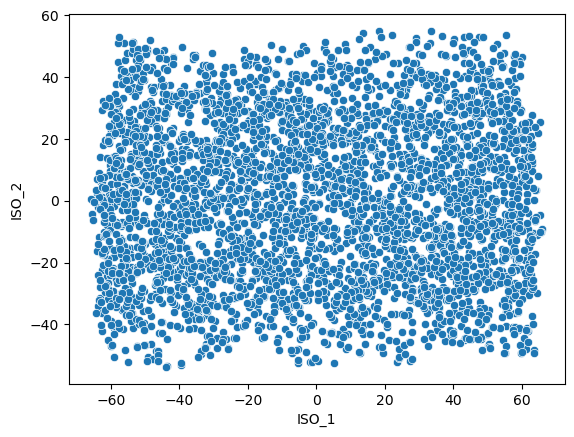

In [53]:
sns.scatterplot(data=df_isomap_df, x="ISO_1", y="ISO_2");

In [54]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=17)
#tsne.fit(df_encoded_additional)

df_tsne_np = tsne.fit_transform(df_encoded_additional)
df_tsne = pd.DataFrame(df_tsne_np, columns=["TSNE_1", "TSNE_2"], index=df_encoded_additional.index)
df_tsne.head()

,TSNE_1,TSNE_2
0,-9.549915,17.677174
1,2.221653,-51.507656
2,12.850538,22.068037
3,38.081173,-25.397264
4,-15.700242,-1.882392


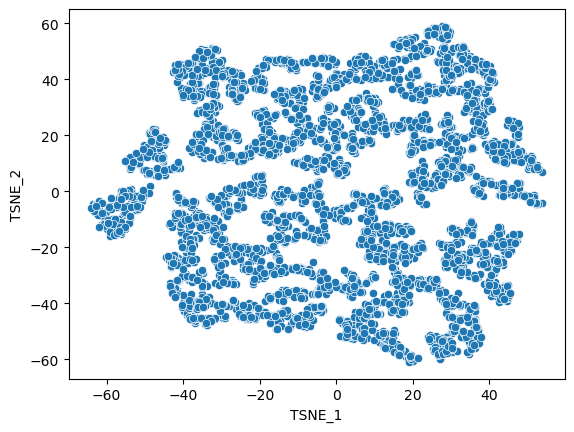

In [55]:
sns.scatterplot(data=df_tsne, x="TSNE_1", y="TSNE_2");

In [56]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, random_state=17)


df_lle_np = lle.fit_transform(df_encoded_additional)
df_lle = pd.DataFrame(df_lle_np, columns=["LLE_1", "LLE_2"], index=df_encoded_additional.index)
df_lle.head()

,LLE_1,LLE_2
0,-0.003142,-0.011225
1,-0.002237,0.001429
2,-0.009660,-0.002293
3,-0.015058,0.015184
4,0.005451,-0.009201


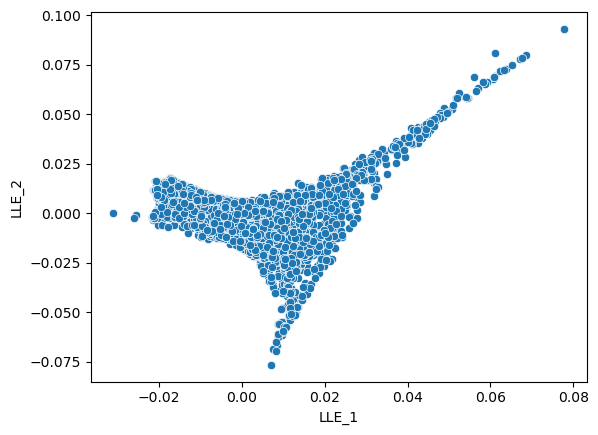

In [57]:
sns.scatterplot(data=df_lle, x="LLE_1", y="LLE_2");

In [61]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Relevant features for clustering
features = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases', 'Gender_Male', 
            'Subscription Status_Yes', 'Discount Applied_Yes', 'Promo Code Used_Yes']
# Standardize numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded[features])

import pickle 

with open("../scalers/standard_scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

# Choose the number of clusters (k)
k = 12

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_scaled)
kmeans.inertia_

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
df_encoded['Cluster'] = cluster_labels

# Analyze the clusters
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
print("Cluster Centers:")
print(cluster_centers_df)


C:\Users\ALEV PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers:
         Age  Purchase Amount (USD)  Review Rating  Previous Purchases  \
0  -0.710601              -0.832972      -0.269358            0.060082   
1   0.628027              -0.140855      -0.557184            0.838634   
2   0.728648              -0.809420      -0.390826            0.260997   
3   0.097939               0.779213       0.222062           -0.166561   
4  -0.422476               0.950641       0.256465           -0.020490   
5   0.719372               0.014217       0.839124           -0.669568   
6  -1.006268              -0.333368       0.175732           -0.454468   
7  -0.421209              -0.015958      -0.831379           -0.893653   
8   0.255058               1.007159       0.287369            0.232986   
9  -0.106944              -0.850530      -0.263990            0.140965   
10 -0.903073               0.240783       0.685235            0.532709   
11  1.042815              -0.236968      -0.046599            0.111341   

    Gender_Male  Sub

In [62]:
# Inverse transform the standardized cluster centers to the original scale
cluster_centers_original_scale = scaler.inverse_transform(cluster_centers)

# Create a DataFrame to display the cluster centers in the original scale
cluster_centers_original_scale_df = pd.DataFrame(cluster_centers_original_scale, columns=features)
print("Cluster Centers (Original Scale):")
cluster_centers_original_scale_df

Cluster Centers (Original Scale):


,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Male,Subscription Status_Yes,Discount Applied_Yes,Promo Code Used_Yes
0,33.263323,40.037618,3.557053,26.219436,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,53.618012,56.428571,3.350932,37.465839,2.220446e-16,-7.216450e-16,-2.775558e-16,-2.775558e-16
2,55.148026,40.595395,3.470066,29.121711,1.000000e+00,-4.996004e-16,4.996004e-16,4.996004e-16
3,45.557692,78.217949,3.908974,22.945513,1.000000e+00,-1.443290e-15,1.000000e+00,1.000000e+00
4,37.644444,82.277778,3.933611,25.055556,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
5,55.006969,60.101045,4.350871,15.679443,-7.771561e-16,-5.551115e-16,1.665335e-16,1.665335e-16
6,28.767516,51.869427,3.875796,18.786624,1.000000e+00,-6.106227e-16,3.885781e-16,3.885781e-16
7,37.663717,59.386431,3.154572,12.442478,-6.661338e-16,-7.216450e-16,2.775558e-16,2.775558e-16
8,47.946779,83.616246,3.955742,28.717087,1.000000e+00,-7.771561e-16,5.551115e-17,5.551115e-17
9,42.442308,39.621795,3.560897,27.387821,1.000000e+00,-1.443290e-15,1.000000e+00,1.000000e+00


In [65]:
cluster_centers_original_scale_df.to_csv('cluster_centers_original_scale.csv', index=False)


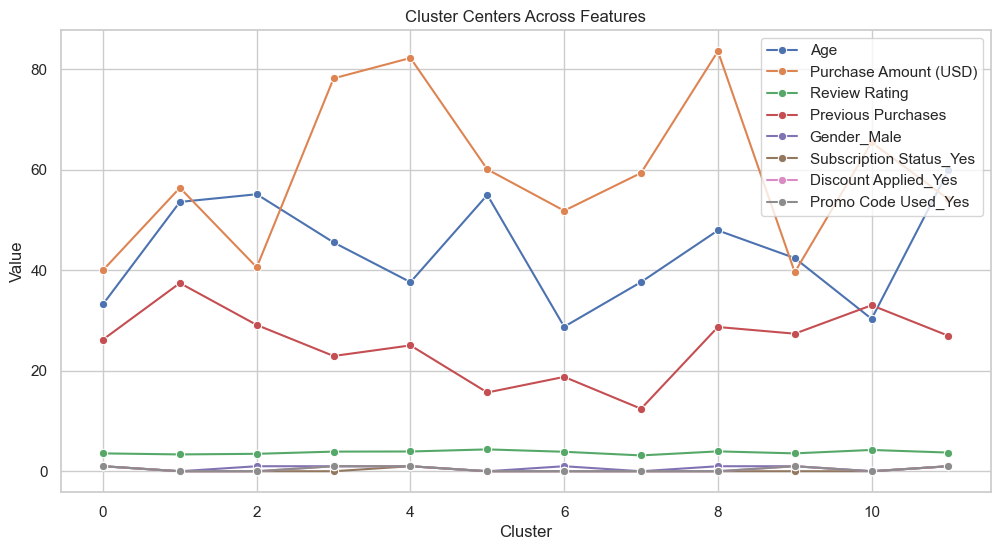

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Plot each feature across different clusters
plt.figure(figsize=(12, 6))

# Iterate through each column in the DataFrame
for column in cluster_centers_original_scale_df.columns:
    # Exclude non-numeric columns such as categorical variables
    if cluster_centers_original_scale_df[column].dtype in ['int64', 'float64']:
        # Plot the feature for each cluster
        sns.lineplot(data=cluster_centers_original_scale_df, x=cluster_centers_original_scale_df.index, y=column, marker="o", label=column)

# Set plot title and labels
plt.title('Cluster Centers Across Features')
plt.xlabel('Cluster')
plt.ylabel('Value')

# Show legend
plt.legend()

# Show plot
plt.show()


In [33]:
# Inverse transform the standardized cluster centers to the original scale
cluster_centers_original_scale = scaler.inverse_transform(cluster_centers)

# Create a DataFrame to display the cluster centers in the original scale
cluster_centers_original_scale_df = pd.DataFrame(cluster_centers_original_scale, columns=features)
print("Cluster Centers (Original Scale):")
cluster_centers_original_scale_df

Cluster Centers (Original Scale):


,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Male,Subscription Status_Yes,Discount Applied_Yes,Promo Code Used_Yes
0,45.665574,60.314754,3.548525,37.881967,1.000000e+00,-1.443290e-15,1.000000e+00,1.000000e+00
1,43.077088,59.880086,4.500000,24.959315,1.221245e-15,-1.165734e-15,-7.216450e-16,-7.216450e-16
2,43.159091,58.699495,3.259596,10.984848,0.000000e+00,-9.436896e-16,-1.110223e-16,-1.110223e-16
3,42.339623,57.462264,3.910063,12.962264,1.000000e+00,-1.498801e-15,1.000000e+00,1.000000e+00
4,29.704188,54.586387,3.550524,23.272251,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
5,42.722338,81.083507,3.921086,26.369520,1.000000e+00,-1.165734e-15,-7.216450e-16,-7.216450e-16
6,47.190476,79.752381,4.308254,28.200000,1.000000e+00,9.968254e-01,1.000000e+00,1.000000e+00
7,46.067358,62.321244,3.315026,38.181347,2.590674e-03,-8.881784e-16,-4.440892e-16,-4.440892e-16
8,57.218487,46.969188,3.451821,27.232493,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
9,45.216162,39.527273,3.643030,24.898990,1.000000e+00,-1.221245e-15,-8.881784e-16,-8.881784e-16


In [ ]:
# Purchase Amount (USD) = (60.314754, 59.880086, 58.699495, 57.462264, 54.586387, 81.083507, 79.752381, 62.321244, 46.969188, 39.527273) 
# Age = (45.665574, 43.077088, 43.159091, 42.339623, 29.704188, 42.722338, 47.190476, 46.067358, 57.218487, 45.216162)
# Review Rating = (3.548525, 4.500000, 3.259596, 3.910063, 3.550524, 3.921086, 4.308254, 3.315026, 3.451821, 3.643030)
# Previous Purchases = (37.881967, 24.959315, 10.984848, 12.962264, 23.272251, 26.369520, 28.200000, 38.181347, 27.232493, 24.898990)


# For these ones, negatives are no responses while positives are true
# Gender_Male = (1, -1, -1, 1, 1, 1, 1, -1, 1, 1)
# Subscription Status_Yes = (-1, -1, -1, -1, 1, -1, 1, -1, 1, -1)
# Discount Applied_Yes = (1, -1, -1, 1, 1, -1, 1, -1, 1, -1)
# Promo Code Used_Yes = (1, -1, -1, 1, 1, -1, 1, -1, 1, -1)

In [7]:
import numpy as np
from scipy.stats import pearsonr

# Data
purchase_amount = np.array([60.314754, 59.880086, 58.699495, 57.462264, 54.586387, 81.083507, 79.752381, 62.321244, 46.969188, 39.527273])
age = np.array([45.665574, 43.077088, 43.159091, 42.339623, 29.704188, 42.722338, 47.190476, 46.067358, 57.218487, 45.216162])
review_rating = np.array([3.548525, 4.500000, 3.259596, 3.910063, 3.550524, 3.921086, 4.308254, 3.315026, 3.451821, 3.643030])
previous_purchases = np.array([37.881967, 24.959315, 10.984848, 12.962264, 23.272251, 26.369520, 28.200000, 38.181347, 27.232493, 24.898990])
gender_male = np.array([1, -1, -1, 1, 1, 1, 1, -1, 1, 1])
subscription_status_yes = np.array([-1, -1, -1, -1, 1, -1, 1, -1, 1, -1])
discount_applied_yes = np.array([1, -1, -1, 1, 1, -1, 1, -1, 1, -1])
promo_code_used_yes = np.array([1, -1, -1, 1, 1, -1, 1, -1, 1, -1])

# Calculate correlation coefficients
correlation_matrix = np.corrcoef([purchase_amount, age, review_rating, previous_purchases, gender_male, subscription_status_yes, discount_applied_yes, promo_code_used_yes])

# Print correlation matrix
print("Correlation Matrix:")
display(correlation_matrix)


Correlation Matrix:


array([[ 1.        , -0.09502738,  0.43921281,  0.15564496, -0.01300755,
         0.02034393, -0.02003832, -0.02003832],
       [-0.09502738,  1.        , -0.05685269,  0.26734696,  0.01390385,
         0.04828581,  0.02954927,  0.02954927],
       [ 0.43921281, -0.05685269,  1.        , -0.05054292,  0.08219921,
         0.04907931,  0.03325633,  0.03325633],
       [ 0.15564496,  0.26734696, -0.05054292,  1.        ,  0.06154362,
         0.05800504,  0.04970818,  0.04970818],
       [-0.01300755,  0.01390385,  0.08219921,  0.06154362,  1.        ,
         0.42857143,  0.65465367,  0.65465367],
       [ 0.02034393,  0.04828581,  0.04907931,  0.05800504,  0.42857143,
         1.        ,  0.65465367,  0.65465367],
       [-0.02003832,  0.02954927,  0.03325633,  0.04970818,  0.65465367,
         0.65465367,  1.        ,  1.        ],
       [-0.02003832,  0.02954927,  0.03325633,  0.04970818,  0.65465367,
         0.65465367,  1.        ,  1.        ]])

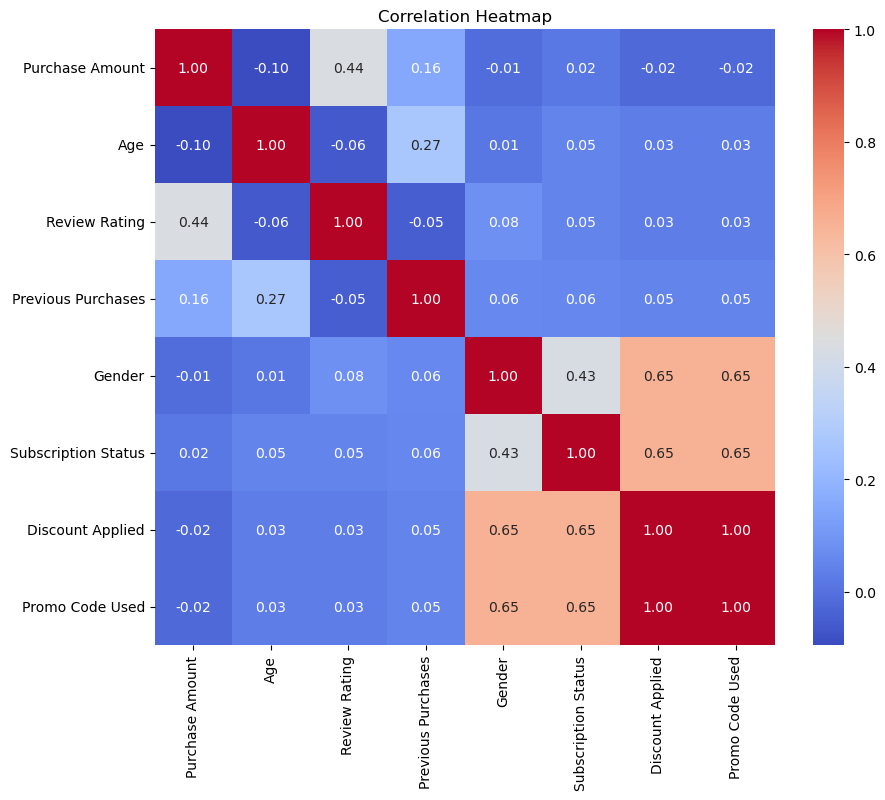

In [63]:
# CORRELATION HEATMAP

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the correlation matrix
correlation_matrix = np.array([[ 1.        , -0.09502738,  0.43921281,  0.15564496, -0.01300755,
                                 0.02034393, -0.02003832, -0.02003832],
                               [-0.09502738,  1.        , -0.05685269,  0.26734696,  0.01390385,
                                 0.04828581,  0.02954927,  0.02954927],
                               [ 0.43921281, -0.05685269,  1.        , -0.05054292,  0.08219921,
                                 0.04907931,  0.03325633,  0.03325633],
                               [ 0.15564496,  0.26734696, -0.05054292,  1.        ,  0.06154362,
                                 0.05800504,  0.04970818,  0.04970818],
                               [-0.01300755,  0.01390385,  0.08219921,  0.06154362,  1.        ,
                                 0.42857143,  0.65465367,  0.65465367],
                               [ 0.02034393,  0.04828581,  0.04907931,  0.05800504,  0.42857143,
                                 1.        ,  0.65465367,  0.65465367],
                               [-0.02003832,  0.02954927,  0.03325633,  0.04970818,  0.65465367,
                                 0.65465367,  1.        ,  1.        ],
                               [-0.02003832,  0.02954927,  0.03325633,  0.04970818,  0.65465367,
                                 0.65465367,  1.        ,  1.        ]])

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=['Purchase Amount', 'Age', 'Review Rating', 'Previous Purchases', 
                         'Gender', 'Subscription Status', 'Discount Applied', 'Promo Code Used'],
            yticklabels=['Purchase Amount', 'Age', 'Review Rating', 'Previous Purchases', 
                         'Gender', 'Subscription Status', 'Discount Applied', 'Promo Code Used'])
plt.title('Correlation Heatmap')
plt.show()


In [8]:
import numpy as np
from scipy.stats import pearsonr

# Define the variables
purchase_amount = np.array([60.314754, 59.880086, 58.699495, 57.462264, 54.586387, 81.083507, 79.752381, 62.321244, 46.969188, 39.527273])
previous_purchases = np.array([37.881967, 24.959315, 10.984848, 12.962264, 23.272251, 26.369520, 28.200000, 38.181347, 27.232493, 24.898990])
subscription_status_yes = np.array([-1, -1, -1, -1, 1, -1, 1, -1, 1, -1])
discount_applied_yes = np.array([1, -1, -1, 1, 1, -1, 1, -1, 1, -1])
promo_code_used_yes = np.array([1, -1, -1, 1, 1, -1, 1, -1, 1, -1])
review_rating = np.array([3.548525, 4.500000, 3.259596, 3.910063, 3.550524, 3.921086, 4.308254, 3.315026, 3.451821, 3.643030])

# Calculate correlations
correlation_purchase_subscription, _ = pearsonr(purchase_amount, subscription_status_yes)
correlation_purchase_discount, _ = pearsonr(purchase_amount, discount_applied_yes)
correlation_purchase_promo, _ = pearsonr(purchase_amount, promo_code_used_yes)
correlation_purchase_previous, _ = pearsonr(purchase_amount, previous_purchases)
correlation_purchase_rating, _ = pearsonr(purchase_amount, review_rating)

# Print correlations
print("Correlation between Purchase Amount and Subscription Status:", correlation_purchase_subscription)
print("Correlation between Purchase Amount and Discount Applied:", correlation_purchase_discount)
print("Correlation between Purchase Amount and Promo Code Used:", correlation_purchase_promo)
print("Correlation between Purchase Amount and Previous Purchases:", correlation_purchase_previous)
print("Correlation between Purchase Amount and Review Rating:", correlation_purchase_rating)


Correlation between Purchase Amount and Subscription Status: 0.02034393492984038
Correlation between Purchase Amount and Discount Applied: -0.020038315657650407
Correlation between Purchase Amount and Promo Code Used: -0.020038315657650407
Correlation between Purchase Amount and Previous Purchases: 0.1556449647321284
Correlation between Purchase Amount and Review Rating: 0.43921280652231354


In [ ]:
# Interpretation of the correlations between purchase amount and the other variables:

# Correlation between Purchase Amount and Subscription Status (0.020):

# The correlation coefficient is close to 0, indicating a very weak positive correlation.
# This suggests that there is almost no linear relationship between purchase amount and subscription status. In other words, knowing a customer's subscription status doesn't provide much information about their purchase amount.
# Correlation between Purchase Amount and Discount Applied (-0.020):

# The correlation coefficient is close to 0, indicating a very weak negative correlation.
# This suggests that there is almost no linear relationship between purchase amount and whether a discount was applied. In other words, knowing whether a discount was applied doesn't provide much information about the purchase amount.
# Correlation between Purchase Amount and Promo Code Used (-0.020):

# The correlation coefficient is close to 0, indicating a very weak negative correlation.
# This suggests that there is almost no linear relationship between purchase amount and whether a promo code was used. In other words, knowing whether a promo code was used doesn't provide much information about the purchase amount.
# Correlation between Purchase Amount and Previous Purchases (0.156):

# The correlation coefficient is positive and moderate (0.156).
# This suggests a weak positive relationship between purchase amount and the number of previous purchases. Customers who have made more previous purchases tend to have slightly higher purchase amounts, but the correlation is not very strong.
# Correlation between Purchase Amount and Review Rating (0.439):

# The correlation coefficient is positive and moderate to strong (0.439).
# This suggests a moderate to strong positive relationship between purchase amount and review rating. Customers who give higher review ratings tend to have higher purchase amounts, indicating that satisfied customers may spend more.
# In summary, the correlation analysis indicates that while there is a weak positive relationship between purchase amount and previous purchases, the review rating shows a moderate to strong positive relationship with purchase amount. 
# However, subscription status, discounts, and promo codes used have almost no linear relationship with purchase amount.

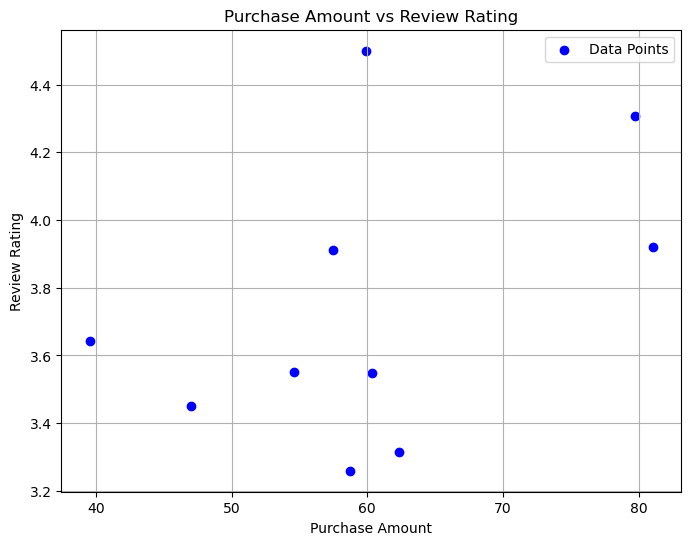

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
purchase_amount = np.array([60.314754, 59.880086, 58.699495, 57.462264, 54.586387, 81.083507, 79.752381, 62.321244, 46.969188, 39.527273])
review_rating = np.array([3.548525, 4.500000, 3.259596, 3.910063, 3.550524, 3.921086, 4.308254, 3.315026, 3.451821, 3.643030])

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(purchase_amount, review_rating, color='blue', label='Data Points')
plt.title('Purchase Amount vs Review Rating')
plt.xlabel('Purchase Amount')
plt.ylabel('Review Rating')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
import numpy as np

# Given data
purchase_amount = np.array([60.314754, 59.880086, 58.699495, 57.462264, 54.586387, 81.083507, 79.752381, 62.321244, 46.969188, 39.527273])
previous_purchases = np.array([37.881967, 24.959315, 10.984848, 12.962264, 23.272251, 26.369520, 28.200000, 38.181347, 27.232493, 24.898990])
subscription_status_yes = np.array([-1, -1, -1, -1, 1, -1, 1, -1, 1, -1])
discount_applied_yes = np.array([1, -1, -1, 1, 1, -1, 1, -1, 1, -1])
promo_code_used_yes = np.array([1, -1, -1, 1, 1, -1, 1, -1, 1, -1])
review_rating = np.array([3.548525, 4.500000, 3.259596, 3.910063, 3.550524, 3.921086, 4.308254, 3.315026, 3.451821, 3.643030])

# Calculate Pearson correlation coefficients
correlation_purchase_previous = np.corrcoef(purchase_amount, previous_purchases)[0, 1]
correlation_previous_subscription = np.corrcoef(previous_purchases, subscription_status_yes)[0, 1]
correlation_previous_discount = np.corrcoef(previous_purchases, discount_applied_yes)[0, 1]
correlation_previous_promo = np.corrcoef(previous_purchases, promo_code_used_yes)[0, 1]
correlation_previous_review = np.corrcoef(previous_purchases, review_rating)[0, 1]

# Print the results
print("Pearson correlation between Previous Purchases and Purchase Amount:", correlation_purchase_previous)
print("Pearson correlation between Previous Purchases and Subscription Status:", correlation_previous_subscription)
print("Pearson correlation between Previous Purchases and Discount Applied Status:", correlation_previous_discount)
print("Pearson correlation between Previous Purchases and Promo Code Used Status:", correlation_previous_promo)
print("Pearson correlation between Previous Purchases and Review Rating:", correlation_previous_review)


Pearson correlation between Previous Purchases and Purchase Amount: 0.15564496473212838
Pearson correlation between Previous Purchases and Subscription Status: 0.05800503995229974
Pearson correlation between Previous Purchases and Discount Applied Status: 0.04970817812901154
Pearson correlation between Previous Purchases and Promo Code Used Status: 0.04970817812901154
Pearson correlation between Previous Purchases and Review Rating: -0.050542915819215044


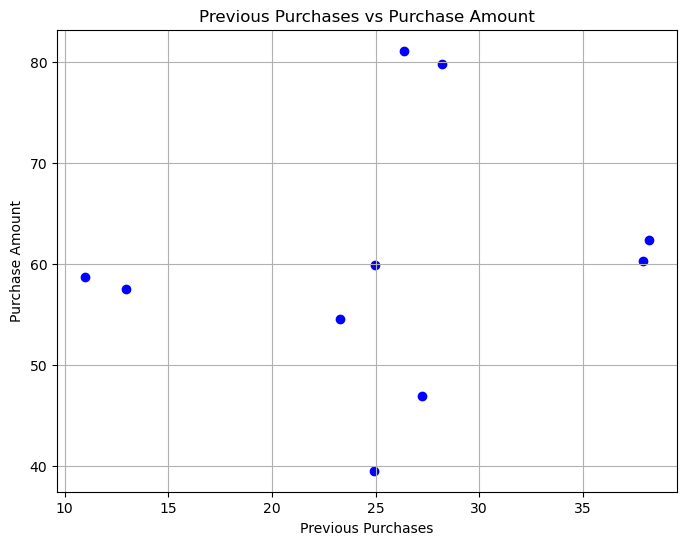

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
purchase_amount = np.array([60.314754, 59.880086, 58.699495, 57.462264, 54.586387, 81.083507, 79.752381, 62.321244, 46.969188, 39.527273])
previous_purchases = np.array([37.881967, 24.959315, 10.984848, 12.962264, 23.272251, 26.369520, 28.200000, 38.181347, 27.232493, 24.898990])

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(previous_purchases, purchase_amount, color='blue')
plt.title('Previous Purchases vs Purchase Amount')
plt.xlabel('Previous Purchases')
plt.ylabel('Purchase Amount')
plt.grid(True)
plt.show()


In [12]:
import numpy as np
from sklearn.cluster import KMeans

# Age data
age_groups = np.array([45.665574, 43.077088, 43.159091, 42.339623, 29.704188, 
                       42.722338, 47.190476, 46.067358, 57.218487, 45.216162])

# Reshape age data to 2D array
age_groups_2d = age_groups.reshape(-1, 1)

# Number of clusters
num_clusters = 10

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(age_groups_2d)

# Obtain cluster labels
cluster_labels = kmeans.labels_

# Print cluster labels
print("Cluster Labels:")
print(cluster_labels)


C:\Users\ALEV PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ALEV PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Labels:
[7 4 9 0 2 8 5 3 1 6]


In [13]:
# ANOVA test (for comparing more than two clusters):

from scipy.stats import ttest_ind, f_oneway

# Extract purchase amount data and cluster labels
purchase_amount = [64.609023, 36.324873, 56.375940, 33.674757, 81.987730, 79.491150, 40.715116, 37.010204, 36.418994, 40.079167, 36.260274, 82.029586, 85.202186, 86.331361, 32.790123, 39.631579, 83.147208, 81.730337, 80.524272, 83.320000, 58.164384, 63.140449]
cluster_labels = [7, 4, 9, 0, 2, 8, 5, 3, 1, 6]  

# Group purchase amount data by cluster labels
cluster_data = {}
for cluster_label, amount in zip(cluster_labels, purchase_amount):
    if cluster_label not in cluster_data:
        cluster_data[cluster_label] = []
    cluster_data[cluster_label].append(amount)

# Perform t-tests or ANOVA
if len(set(cluster_labels)) == 2:  # Two clusters
    cluster1 = cluster_data[0]
    cluster2 = cluster_data[1]
    t_statistic, p_value = ttest_ind(cluster1, cluster2)
    print("T-test results:")
    print("T-statistic:", t_statistic)
    print("P-value:", p_value)
elif len(set(cluster_labels)) > 2:  # More than two clusters (ANOVA)
    clusters = [cluster_data[label] for label in sorted(cluster_data.keys())]
    f_statistic, p_value = f_oneway(*clusters)
    print("ANOVA results:")
    print("F-statistic:", f_statistic)
    print("P-value:", p_value)
else:
    print("Insufficient clusters for comparison.")


ANOVA results:
F-statistic: nan
P-value: nan


C:\Users\ALEV PC\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4141: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))


In [14]:
from scipy.stats import ttest_ind

# Purchase amount data for each cluster
purchase_amount_clusters = {
    0: [64.609023, 56.375940, 81.987730, 40.715116, 36.260274, 83.147208, 80.524272, 58.164384],
    1: [36.324873, 33.674757, 37.010204, 85.202186, 39.631579, 63.140449],
    2: [79.491150, 40.079167, 82.029586, 32.790123, 81.730337],
    # Add purchase amount data for other clusters if available
}

# Perform t-tests between pairs of clusters
for cluster1_label in purchase_amount_clusters:
    for cluster2_label in purchase_amount_clusters:
        if cluster1_label < cluster2_label:  # To avoid duplicate pairs and self-comparisons
            cluster1_data = purchase_amount_clusters[cluster1_label]
            cluster2_data = purchase_amount_clusters[cluster2_label]
            t_statistic, p_value = ttest_ind(cluster1_data, cluster2_data)
            print(f"T-test between Cluster {cluster1_label} and Cluster {cluster2_label}:")
            print("T-statistic:", t_statistic)
            print("P-value:", p_value)

        

T-test between Cluster 0 and Cluster 1:
T-statistic: 1.297663620313158
P-value: 0.2187936468748929
T-test between Cluster 0 and Cluster 2:
T-statistic: -0.042177451216043625
P-value: 0.9671130889683273
T-test between Cluster 1 and Cluster 2:
T-statistic: -1.0315398934581383
P-value: 0.32921029442322947


# HDBSCAN

In [35]:
from sklearn.cluster import HDBSCAN

#import hdbscan
import numpy as np

# Define your data
data = np.array([
    [60.314754, 45.665574, 3.548525, 37.881967],
    [59.880086, 43.077088, 4.500000, 24.959315],
    [58.699495, 43.159091, 3.259596, 10.984848],
    [57.462264, 42.339623, 3.910063, 12.962264],
    [54.586387, 29.704188, 3.550524, 23.272251],
    [81.083507, 42.722338, 3.921086, 26.369520],
    [79.752381, 47.190476, 4.308254, 28.200000],
    [62.321244, 46.067358, 3.315026, 38.181347],
    [46.969188, 57.218487, 3.451821, 27.232493],
    [39.527273, 45.216162, 3.643030, 24.898990]
])

# Apply HDBSCAN
clusterer = HDBSCAN()
cluster_labels = clusterer.fit_predict(df_scaled)

#clusterer = hdbscan.HDBSCAN(min_cluster_size=3)
#cluster_labels = clusterer.fit_predict(data)

# Print cluster labels
print("Cluster Labels:")
print(cluster_labels)


Cluster Labels:
[0 0 0 ... 3 3 3]


In [36]:
df_encoded_additional['HDBSCAN_5'] = cluster_labels
df_encoded_additional.iloc[:,-3:]

,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly,HDBSCAN_5
0,0.0,0.0,0
1,0.0,0.0,0
2,0.0,1.0,0
3,0.0,1.0,0
4,0.0,0.0,0
...,...,...,...
3895,0.0,1.0,3
3896,0.0,0.0,3
3897,1.0,0.0,3
3898,0.0,1.0,3


In [37]:
df_encoded_additional['HDBSCAN_5'].unique()

array([0, 1, 2, 3], dtype=int64)

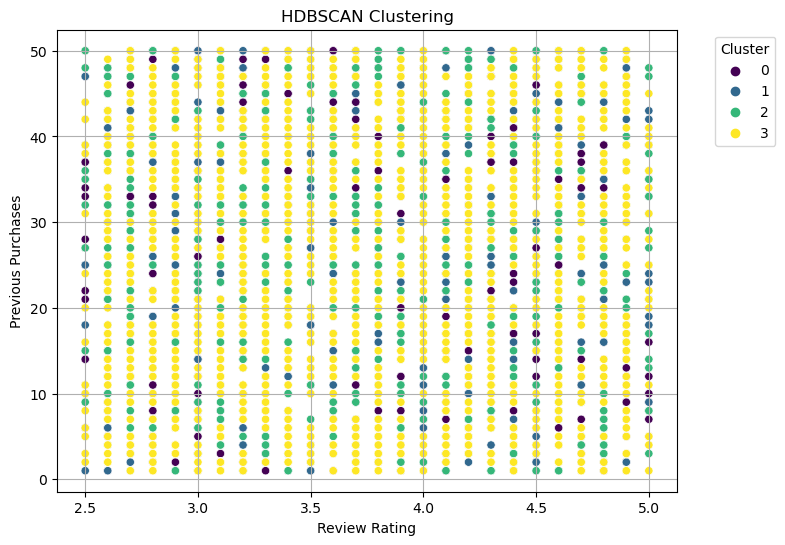

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

feature1 = df_encoded_additional['Review Rating']
feature2 = df_encoded_additional['Previous Purchases']
labels = df_encoded_additional['HDBSCAN_5']

# Plotting the clusters
plt.figure(figsize=(8, 6))

# Plot each cluster with different color
sns.scatterplot(x=feature1, y=feature2, hue=labels, palette='viridis')

plt.title('HDBSCAN Clustering')
plt.xlabel('Review Rating')
plt.ylabel('Previous Purchases')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


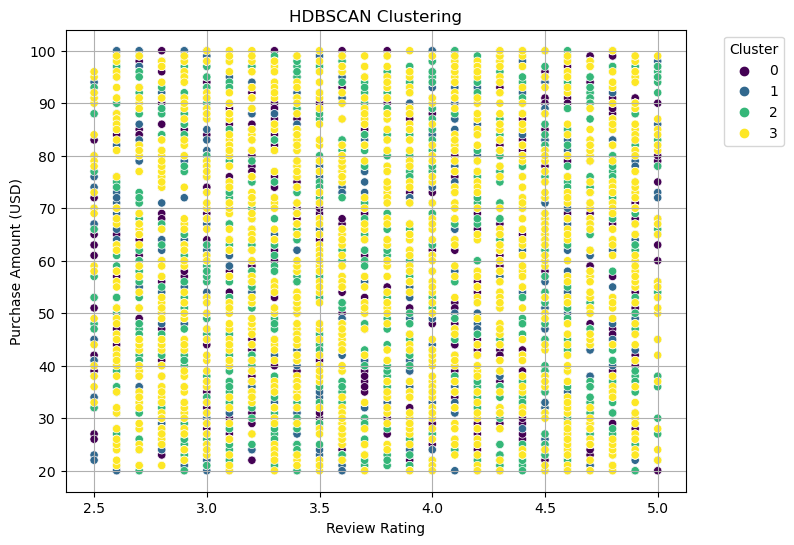

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

feature1 = df_encoded_additional['Review Rating']
feature2 = df_encoded_additional['Purchase Amount (USD)']
labels = df_encoded_additional['HDBSCAN_5']

# Plotting the clusters
plt.figure(figsize=(8, 6))

# Plot each cluster with different color
sns.scatterplot(x=feature1, y=feature2, hue=labels, palette='viridis')

plt.title('HDBSCAN Clustering')
plt.xlabel('Review Rating')
plt.ylabel('Purchase Amount (USD)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()